##Unggah CSV

In [ ]:
import pandas as pd

# Mengunggah file CSV
file_path = 'makanan_manis.csv'  # Sesuaikan dengan path file CSV
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.650000e+18,Fri Apr 14 09:29:03 +0000 2023,0,Meski kita disarankan untuk mengonsumsi asupan...,1.650000e+18,NaN,NaN,in,Jakarta,0,0,0,https://x.com/kompascom/status/164680777199061...,2.334396e+07,kompascom
1,1.650000e+18,Fri Apr 14 10:23:35 +0000 2023,0,@lalalandiann Yup. Kurangi makanan yang mengan...,1.650000e+18,NaN,lalalandiann,in,NaN,0,0,0,https://x.com/BiLLYKHAERUDIN/status/1646821495...,4.938367e+07,BiLLYKHAERUDIN
2,1.740000e+18,Fri Dec 29 09:40:10 +0000 2023,0,Bagaimana kalau teh dan makanan manis Nona?,1.740000e+18,NaN,NaN,in,pfp: code_tesseract,0,0,0,https://x.com/SitiSenarai/status/1740669027155...,7.670000e+17,SitiSenarai
3,1.630000e+18,Fri Feb 24 04:17:55 +0000 2023,0,@outer_cosmo Engga begitu. Tapi kadang butuh m...,1.630000e+18,NaN,outer_cosmo,in,S-IC. NSA. PG-21+,0,0,0,https://x.com/khittern/status/1628972467372048384,2.350000e+09,khittern
4,1.630000e+18,Fri Feb 17 00:17:53 +0000 2023,0,Makanan makin manis aktifitas kian menipis kes...,1.630000e+18,NaN,NaN,in,Ankh-Morpork,0,0,0,https://x.com/OtderA/status/1626375345451724801,1.620000e+18,OtderA


##Drop Kolom

In [ ]:
# Drop Kolom
import pandas as pd

# Muat dataset
df = pd.read_csv('makanan_manis.csv')

# Drop kolom 'kolom1', 'kolom2', dan 'kolom3'
df = df.drop(columns=['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username'], axis=1)

# Simpan dataset yang telah diubah
df.to_csv('makanan_manis_full_text.csv', index=False)
df.head()

,full_text
0,Meski kita disarankan untuk mengonsumsi asupan...
1,@lalalandiann Yup. Kurangi makanan yang mengan...
2,Bagaimana kalau teh dan makanan manis Nona?
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...
4,Makanan makin manis aktifitas kian menipis kes...


##Pembersihan Data yang Digunakan (Kata Kunci yang Tepat)

In [ ]:
import pandas as pd

df_clean = df[df['full_text'].str.contains('makanan', case=False, na=False)]
print(f"Jumlah data setelah filter: {len(df_clean)}")
df_clean.head()


Jumlah data setelah filter: 4101


,full_text
0,Meski kita disarankan untuk mengonsumsi asupan...
1,@lalalandiann Yup. Kurangi makanan yang mengan...
2,Bagaimana kalau teh dan makanan manis Nona?
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...
4,Makanan makin manis aktifitas kian menipis kes...


##Pembersihan Data yang Digunakan (Menghapus Data yang Terduplikasi)

In [ ]:
# Remove duplicate rows
df_clean.drop_duplicates(inplace=True)

print(f"Jumlah data setelah hapus duplikasi: {len(df_clean)}")
df_clean.head()

Jumlah data setelah hapus duplikasi: 3997


<ipython-input-4-9e80459d2367>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(inplace=True)


,full_text
0,Meski kita disarankan untuk mengonsumsi asupan...
1,@lalalandiann Yup. Kurangi makanan yang mengan...
2,Bagaimana kalau teh dan makanan manis Nona?
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...
4,Makanan makin manis aktifitas kian menipis kes...


###Translating (Deep Translator)

In [ ]:
pip install -U deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
import re

In [ ]:
translator = GoogleTranslator(source='auto', target="en")
translations = {}

clean_text_column = df_clean['full_text']
unique_full_text = clean_text_column.unique()
for element in unique_full_text:
    if element is not None:  # Mengecek NoneType
        try:
            element_nm = re.sub(r'@\w+', '', element)
            element_nurl = re.sub(r'https\S+|www.\S+', '', element_nm)
            translations[element] = translator.translate(element_nurl)
            print(translator.translate(element_nurl))
        except Exception as e:
            print(f"Error translating '{element}': {str(e)}")
            translations[element] = element  # Jika error, tidak akan ditranslate

# translate_text = translator.translate_batch(unique_full_text.tolist())
# translation = dict(zip(unique_full_text, translate_text))

df_clean['translated_text'] = df_clean['full_text'].apply(lambda x: translations.get(x))
df_clean['translated_text'] = df_clean['translated_text'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
df_clean['translated_text'] = df_clean['translated_text'].str.lower()
df_clean.head()

Even though we are advised to consume a balanced nutritional intake, often the temptation of sweet and fatty foods is hard to resist.
Yup. Reduce foods that contain high sugar even if they are not sweet.
How about some tea and sweets, Miss?
Not really. But sometimes you need something sweet.
Food becomes sweeter, activity decreases and health becomes critical.
It's really scary, man, because I'm a diabetic and I like sweet foods, I've started to reduce it by doing intermittent fasting 18:6.
I'm really afraid of diabetes, so until now I'm still keeping my blood sugar low (meaning below normal limits) so I can prepare 1 day for a cheat day with sweet foods
My boyfriend is obsessed with ponut even though he usually hates sweet food.
Many of the foods in Solo have strange tastes and are often bland (if it's sweet, everyone will notice).
Due to the uncontrolled consumption of sweetened foods and drinks, the sugar intake is excessive. Sweet at the beginning, suffering at the end
AGREE. as a 

<ipython-input-9-2c4ac75153d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['translated_text'] = df_clean['full_text'].apply(lambda x: translations.get(x))
<ipython-input-9-2c4ac75153d7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['translated_text'] = df_clean['translated_text'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
<ipython-input-9-2c4ac75153d7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,full_text,translated_text
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?"
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h..."


In [ ]:
df_clean.to_csv('makanan_manis_en.csv', index=False)

In [ ]:
print(df_clean)

                                              full_text  \
0     Meski kita disarankan untuk mengonsumsi asupan...   
1     @lalalandiann Yup. Kurangi makanan yang mengan...   
2           Bagaimana kalau teh dan makanan manis Nona?   
3     @outer_cosmo Engga begitu. Tapi kadang butuh m...   
4     Makanan makin manis aktifitas kian menipis kes...   
...                                                 ...   
4162  @joonjayjosh ohh itu sebenernya masih normal c...   
4163  @full_bear27 @diethingy Makan 3x sehari: - 2 t...   
4164  @dauspozi Aku kelantan tapi aku benci makanan ...   
4165  makanan manis emg bener2 perusak bgt w kaget p...   
4166  @F3NANTRENA kl dpt review yaa atau km pernah n...   

                                        translated_text  
0     even though we are advised to consume a balanc...  
1     yup. reduce foods that contain high sugar even...  
2                  how about some tea and sweets, miss?  
3     not really. but sometimes you need something s...  
4

##Labeling Positif, Negatif, Netral

In [ ]:
df_clean.head()

,full_text,translated_text
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?"
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h..."


<ipython-input-12-a8afb942153f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['sentiment', 'polarity']] = df_clean['translated_text'].apply(lambda x: pd.Series(get_sentiment(x)))
<ipython-input-12-a8afb942153f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['sentiment', 'polarity']] = df_clean['translated_text'].apply(lambda x: pd.Series(get_sentiment(x)))


                                           full_text  \
0  Meski kita disarankan untuk mengonsumsi asupan...   
1  @lalalandiann Yup. Kurangi makanan yang mengan...   
2        Bagaimana kalau teh dan makanan manis Nona?   
3  @outer_cosmo Engga begitu. Tapi kadang butuh m...   
4  Makanan makin manis aktifitas kian menipis kes...   

                                     translated_text sentiment  polarity  
0  even though we are advised to consume a balanc...   Negatif -0.047222  
1  yup. reduce foods that contain high sugar even...   Negatif -0.007500  
2               how about some tea and sweets, miss?    Netral  0.000000  
3  not really. but sometimes you need something s...   Positif  0.125000  
4  food becomes sweeter, activity decreases and h...    Netral  0.000000  
Jumlah Data Sentimen:
sentiment
Positif    2258
Negatif    1479
Netral      260
Name: count, dtype: int64


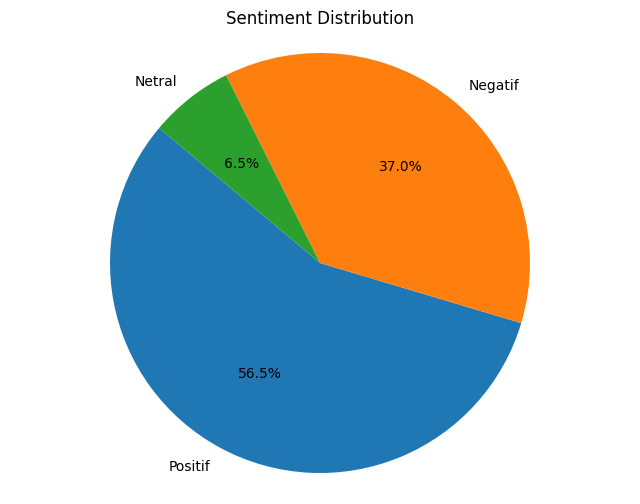

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan sentimen dan polaritas
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positif'
    elif polarity < 0:
        sentiment = 'Negatif'
    else:
        sentiment = 'Netral'
    return sentiment, polarity

# Menerapkan fungsi get_sentiment dan menyimpan hasil sentimen dan polaritas
df_clean[['sentiment', 'polarity']] = df_clean['translated_text'].apply(lambda x: pd.Series(get_sentiment(x)))

# Menampilkan 5 data teratas dengan kolom sentimen dan polaritas
print(df_clean.head())

# Menghitung jumlah masing-masing sentimen
sentiment_counts = df_clean['sentiment'].value_counts()

# Menampilkan jumlah masing-masing sentimen
print("Jumlah Data Sentimen:")
print(sentiment_counts)

# Visualisasi pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sentiment Distribution")
plt.show()


##Preprocessing Data

###Cleaning Text

In [ ]:
import re
import string

# Fungsi untuk cleansing data: menghapus URL, angka, dan tanda baca
def cleansing(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Menghapus URL
    text = re.sub(r'@\w+', '', text)  # Menghapus mention
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    return text

# Menerapkan fungsi cleansing
df_clean['clean_text'] = df_clean['full_text'].apply(cleansing)
df_clean.head()


<ipython-input-13-7d3be0873b4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['full_text'].apply(cleansing)


,full_text,translated_text,sentiment,polarity,clean_text
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...,Negatif,-0.047222,Meski kita disarankan untuk mengonsumsi asupan...
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...,Negatif,-0.007500,Yup Kurangi makanan yang mengandung gula ting...
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?",Netral,0.000000,Bagaimana kalau teh dan makanan manis Nona
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...,Positif,0.125000,Engga begitu Tapi kadang butuh makanan manis
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h...",Netral,0.000000,Makanan makin manis aktifitas kian menipis kes...


###Text Folding

In [ ]:
# Mengubah teks menjadi lowercase
df_clean['folding_text'] = df_clean['clean_text'].str.lower()
df_clean.head()


<ipython-input-14-da449adcfced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['folding_text'] = df_clean['clean_text'].str.lower()


,full_text,translated_text,sentiment,polarity,clean_text,folding_text
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...,Negatif,-0.047222,Meski kita disarankan untuk mengonsumsi asupan...,meski kita disarankan untuk mengonsumsi asupan...
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...,Negatif,-0.007500,Yup Kurangi makanan yang mengandung gula ting...,yup kurangi makanan yang mengandung gula ting...
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?",Netral,0.000000,Bagaimana kalau teh dan makanan manis Nona,bagaimana kalau teh dan makanan manis nona
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...,Positif,0.125000,Engga begitu Tapi kadang butuh makanan manis,engga begitu tapi kadang butuh makanan manis
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h...",Netral,0.000000,Makanan makin manis aktifitas kian menipis kes...,makanan makin manis aktifitas kian menipis kes...


###Tokenisasi

In [ ]:
#tokenisasi
from nltk.tokenize import word_tokenize
import nltk

# Mengunduh paket yang diperlukan
nltk.download('punkt')

# Fungsi untuk tokenisasi
def tokenisasi(text):
    return word_tokenize(text)

# Menerapkan fungsi tokenisasi
df_clean['tokens'] = df_clean['folding_text'].apply(tokenisasi)
df_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-15-571938af09a6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tokens'] = df_clean['folding_text'].apply(tokenisasi)


,full_text,translated_text,sentiment,polarity,clean_text,folding_text,tokens
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...,Negatif,-0.047222,Meski kita disarankan untuk mengonsumsi asupan...,meski kita disarankan untuk mengonsumsi asupan...,"[meski, kita, disarankan, untuk, mengonsumsi, ..."
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...,Negatif,-0.007500,Yup Kurangi makanan yang mengandung gula ting...,yup kurangi makanan yang mengandung gula ting...,"[yup, kurangi, makanan, yang, mengandung, gula..."
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?",Netral,0.000000,Bagaimana kalau teh dan makanan manis Nona,bagaimana kalau teh dan makanan manis nona,"[bagaimana, kalau, teh, dan, makanan, manis, n..."
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...,Positif,0.125000,Engga begitu Tapi kadang butuh makanan manis,engga begitu tapi kadang butuh makanan manis,"[engga, begitu, tapi, kadang, butuh, makanan, ..."
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h...",Netral,0.000000,Makanan makin manis aktifitas kian menipis kes...,makanan makin manis aktifitas kian menipis kes...,"[makanan, makin, manis, aktifitas, kian, menip..."


###Stopwords

In [ ]:
# #stopwords
# from nltk.corpus import stopwords

# # Mengunduh stopwords bahasa inggris
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# # Fungsi untuk menghapus stopwords
# def remove_stopwords(tokens):
#     return [word for word in tokens if word not in stop_words]

# # Menerapkan penghapusan stopwords
# df_clean['tokens_clean'] = df_clean['tokens'].apply(remove_stopwords)
# df_clean.head()

#stopwords
from nltk.corpus import stopwords
import nltk

# Mengunduh stopwords bahasa indonesia
nltk.download('stopwords')
stop_words_id = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords bahasa Indonesia
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words_id]

# Menerapkan penghapusan stopwords pada kolom 'tokens'
df_clean['tokens_clean'] = df_clean['tokens'].apply(remove_stopwords)
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-16-c09c21ed34d7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tokens_clean'] = df_clean['tokens'].apply(remove_stopwords)


,full_text,translated_text,sentiment,polarity,clean_text,folding_text,tokens,tokens_clean
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...,Negatif,-0.047222,Meski kita disarankan untuk mengonsumsi asupan...,meski kita disarankan untuk mengonsumsi asupan...,"[meski, kita, disarankan, untuk, mengonsumsi, ...","[disarankan, mengonsumsi, asupan, bergizi, sei..."
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...,Negatif,-0.007500,Yup Kurangi makanan yang mengandung gula ting...,yup kurangi makanan yang mengandung gula ting...,"[yup, kurangi, makanan, yang, mengandung, gula...","[yup, kurangi, makanan, mengandung, gula, manis]"
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?",Netral,0.000000,Bagaimana kalau teh dan makanan manis Nona,bagaimana kalau teh dan makanan manis nona,"[bagaimana, kalau, teh, dan, makanan, manis, n...","[teh, makanan, manis, nona]"
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...,Positif,0.125000,Engga begitu Tapi kadang butuh makanan manis,engga begitu tapi kadang butuh makanan manis,"[engga, begitu, tapi, kadang, butuh, makanan, ...","[engga, kadang, butuh, makanan, manis]"
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h...",Netral,0.000000,Makanan makin manis aktifitas kian menipis kes...,makanan makin manis aktifitas kian menipis kes...,"[makanan, makin, manis, aktifitas, kian, menip...","[makanan, manis, aktifitas, kian, menipis, kes..."


In [ ]:
print(stop_words_id)

{'ternyata', 'termasuk', 'agak', 'masih', 'mendatangkan', 'siapapun', 'berikutnya', 'terutama', 'mana', 'terjadilah', 'maupun', 'mengenai', 'terbanyak', 'bapak', 'daripada', 'menghendaki', 'jelas', 'sebaiknya', 'bolehlah', 'antar', 'diperbuat', 'dipunyai', 'akhirnya', 'terhadapnya', 'ditunjuknya', 'sinilah', 'datang', 'tanyanya', 'kira', 'menantikan', 'saja', 'berbagai', 'diingatkan', 'bahkan', 'waduh', 'bermacam', 'sebelumnya', 'sering', 'serta', 'anda', 'pertanyakan', 'minta', 'semacam', 'jauh', 'tampak', 'diantaranya', 'memerlukan', 'sebenarnya', 'asal', 'diucapkan', 'dimaksudkan', 'ke', 'sendiri', 'bersama', 'ditujukan', 'begitulah', 'menggunakan', 'mungkin', 'sedangkan', 'lanjutnya', 'melalui', 'menunjukkan', 'entah', 'bermaksud', 'segala', 'waktunya', 'semata', 'kami', 'percuma', 'menuturkan', 'diibaratkan', 'ibaratkan', 'disebutkannya', 'mendatang', 'berikut', 'karenanya', 'berakhirlah', 'supaya', 'bulan', 'menegaskan', 'tegasnya', 'hendak', 'begitupun', 'kinilah', 'dimisalkan',

###Stemming

In [ ]:
!pip install Sastrawi

# Import StemmerFactory dari Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer untuk bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming bahasa Indonesia
def stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Menerapkan stemming pada token yang telah dibersihkan dari stopwords
df_clean['tokens_stemmed'] = df_clean['tokens_clean'].apply(stemming)

# Menggabungkan kembali token yang sudah di-stemming menjadi kalimat
df_clean['clean_text_final'] = df_clean['tokens_stemmed'].apply(lambda x: ' '.join(x))

# Menampilkan hasil
df_clean.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.9 MB/s eta 0:00:00


<ipython-input-18-90446aff04f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tokens_stemmed'] = df_clean['tokens_clean'].apply(stemming)
<ipython-input-18-90446aff04f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text_final'] = df_clean['tokens_stemmed'].apply(lambda x: ' '.join(x))


,full_text,translated_text,sentiment,polarity,clean_text,folding_text,tokens,tokens_clean,tokens_stemmed,clean_text_final
0,Meski kita disarankan untuk mengonsumsi asupan...,even though we are advised to consume a balanc...,Negatif,-0.047222,Meski kita disarankan untuk mengonsumsi asupan...,meski kita disarankan untuk mengonsumsi asupan...,"[meski, kita, disarankan, untuk, mengonsumsi, ...","[disarankan, mengonsumsi, asupan, bergizi, sei...","[saran, konsumsi, asupan, gizi, imbang, sering...",saran konsumsi asupan gizi imbang seringkali g...
1,@lalalandiann Yup. Kurangi makanan yang mengan...,yup. reduce foods that contain high sugar even...,Negatif,-0.007500,Yup Kurangi makanan yang mengandung gula ting...,yup kurangi makanan yang mengandung gula ting...,"[yup, kurangi, makanan, yang, mengandung, gula...","[yup, kurangi, makanan, mengandung, gula, manis]","[yup, kurang, makan, kandung, gula, manis]",yup kurang makan kandung gula manis
2,Bagaimana kalau teh dan makanan manis Nona?,"how about some tea and sweets, miss?",Netral,0.000000,Bagaimana kalau teh dan makanan manis Nona,bagaimana kalau teh dan makanan manis nona,"[bagaimana, kalau, teh, dan, makanan, manis, n...","[teh, makanan, manis, nona]","[teh, makan, manis, nona]",teh makan manis nona
3,@outer_cosmo Engga begitu. Tapi kadang butuh m...,not really. but sometimes you need something s...,Positif,0.125000,Engga begitu Tapi kadang butuh makanan manis,engga begitu tapi kadang butuh makanan manis,"[engga, begitu, tapi, kadang, butuh, makanan, ...","[engga, kadang, butuh, makanan, manis]","[engga, kadang, butuh, makan, manis]",engga kadang butuh makan manis
4,Makanan makin manis aktifitas kian menipis kes...,"food becomes sweeter, activity decreases and h...",Netral,0.000000,Makanan makin manis aktifitas kian menipis kes...,makanan makin manis aktifitas kian menipis kes...,"[makanan, makin, manis, aktifitas, kian, menip...","[makanan, manis, aktifitas, kian, menipis, kes...","[makan, manis, aktifitas, kian, tip, sehat, kr...",makan manis aktifitas kian tip sehat kritis


In [ ]:
df_clean.to_csv('makanan_manis_full_stemming.csv', index=False)

##Lihat Kolom Setelah Preprocessing

In [ ]:
print(df_clean.columns)


Index(['full_text', 'translated_text', 'sentiment', 'polarity', 'clean_text',
       'folding_text', 'tokens', 'tokens_clean', 'tokens_stemmed',
       'clean_text_final'],
      dtype='object')


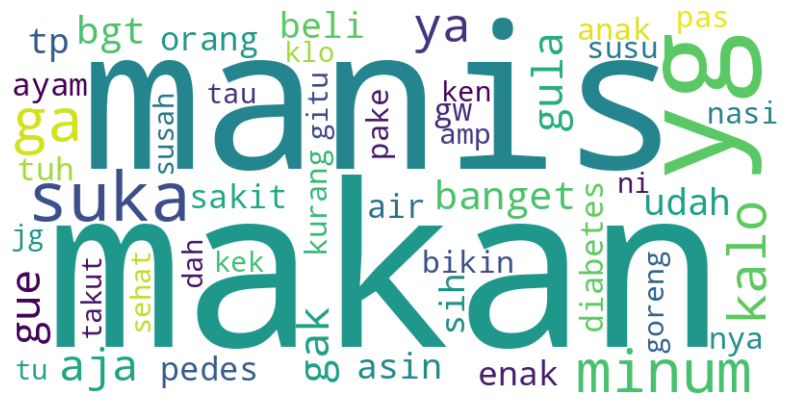

In [ ]:
!pip install wordcloud matplotlib

# Mengunggah file CSV
file_path = 'makanan_manis_full_stemming.csv'  # Sesuaikan dengan path file CSV
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

text = ' '.join(df['clean_text_final']).lower().split()

word_freq = Counter(text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_freq)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

##Ekstraksi TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Menggunakan TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X = tfidf_vectorizer.fit_transform(df_clean['clean_text_final']).toarray()

feature_names = tfidf_vectorizer.get_feature_names_out()

# Menyimpan nilai TF
tf_values = np.divide(X, X.sum(axis=1, keepdims=True), where=X.sum(axis=1, keepdims=True) != 0)

# Menyimpan nilai DF
df_values = np.bincount(X.sum(axis=0).astype(int))[:500]

# Menyimpan nilai IDF
idf_values = tfidf_vectorizer.idf_

# Menampilkan 5 TF, DF, IDF, TFIDF
tf_df = pd.DataFrame(tf_values, columns=feature_names)
df_df = pd.DataFrame(df_values.reshape(1, -1).astype(float), columns=feature_names)
idf_df = pd.DataFrame(idf_values.reshape(1, -1), columns=feature_names)
tfidf_df = pd.DataFrame(tf_values * idf_values, columns=feature_names)

print("\nTF DataFrame:")
print(tf_df.max().nlargest(5))

print("\nDF DataFrame:")
print(df_df.max().nlargest(5))

print("\nIDF DataFrame:")
print(idf_df.max().nlargest(5))

print("\nTF-IDF DataFrame:")
print(tfidf_df.max().nlargest(5))


TF DataFrame:
makan    1.000000
manis    1.000000
suami    0.860632
foto     0.858715
bm       0.856305
dtype: float64

DF DataFrame:
alias            54.0
ama              41.0
alhamdulillah    40.0
allah            40.0
ambil            35.0
dtype: float64

IDF DataFrame:
camil      6.520961
bawang     6.460336
mineral    6.460336
mkn        6.460336
tim        6.460336
dtype: float64

TF-IDF DataFrame:
suami    5.464246
foto     5.366134
bm       5.351074
pergi    4.984883
tim      4.877056
dtype: float64


##Pengujian Naive Bayes

###Pengujian Naive Bayes dengan Beberapa Model (Alpha, Fit-Prior, Class-Prior)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Mengubah label sentimen menjadi angka
df_clean['sentiment_label'] = df_clean['sentiment'].map({'Positif': 1, 'Negatif': -1, 'Netral': 0})

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, df_clean['sentiment_label'], test_size=0.2, random_state=42)

# Kombinasi parameter alpha, fit_prior, dan class_prior untuk dibandingkan
params = [
    {'alpha': 1.0, 'fit_prior': True, 'class_prior': None},   # Default model (alpha=1, fit_prior=True)
    {'alpha': 0.5, 'fit_prior': True, 'class_prior': None},   # Model dengan alpha=0.5
    {'alpha': 1.0, 'fit_prior': False, 'class_prior': [0.3, 0.3, 0.4]},  # Prior manual
    {'alpha': 0.5, 'fit_prior': False, 'class_prior': [0.3, 0.3, 0.4]},  # Kombinasi alpha dan prior manual
]

# Loop untuk melatih dan mengevaluasi setiap model
for i, param in enumerate(params):
    print(f"\nModel {i+1}: alpha={param['alpha']}, fit_prior={param['fit_prior']}, class_prior={param['class_prior']}")

    # Membuat model Naive Bayes dengan parameter tertentu
    nb_model = MultinomialNB(alpha=param['alpha'], fit_prior=param['fit_prior'], class_prior=param['class_prior'])

    # Melatih model
    nb_model.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = nb_model.predict(X_test)

    # Menampilkan akurasi dan laporan klasifikasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))




Model 1: alpha=1.0, fit_prior=True, class_prior=None
Accuracy: 0.6362
              precision    recall  f1-score   support

          -1       0.61      0.31      0.41       291
           0       0.64      0.18      0.29        38
           1       0.64      0.88      0.74       471

    accuracy                           0.64       800
   macro avg       0.63      0.46      0.48       800
weighted avg       0.63      0.64      0.60       800


Model 2: alpha=0.5, fit_prior=True, class_prior=None
Accuracy: 0.6400
              precision    recall  f1-score   support

          -1       0.61      0.35      0.44       291
           0       0.58      0.18      0.28        38
           1       0.65      0.86      0.74       471

    accuracy                           0.64       800
   macro avg       0.61      0.46      0.49       800
weighted avg       0.63      0.64      0.61       800


Model 3: alpha=1.0, fit_prior=False, class_prior=[0.3, 0.3, 0.4]
Accuracy: 0.6050
             


Model 1: alpha=1.0, fit_prior=True, class_prior=None
Accuracy: 0.6362
              precision    recall  f1-score   support

          -1       0.61      0.31      0.41       291
           0       0.64      0.18      0.29        38
           1       0.64      0.88      0.74       471

    accuracy                           0.64       800
   macro avg       0.63      0.46      0.48       800
weighted avg       0.63      0.64      0.60       800

Confusion Matrix:
[[ 89   1 201]
 [  2   7  29]
 [ 55   3 413]]


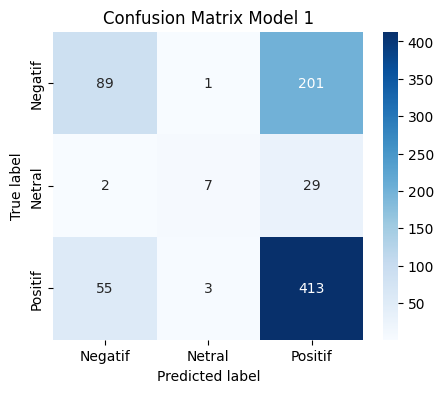


Model 2: alpha=0.5, fit_prior=True, class_prior=None
Accuracy: 0.6400
              precision    recall  f1-score   support

          -1       0.61      0.35      0.44       291
           0       0.58      0.18      0.28        38
           1       0.65      0.86      0.74       471

    accuracy                           0.64       800
   macro avg       0.61      0.46      0.49       800
weighted avg       0.63      0.64      0.61       800

Confusion Matrix:
[[101   1 189]
 [  2   7  29]
 [ 63   4 404]]


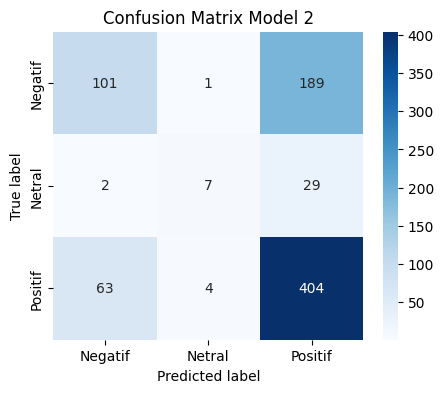


Model 3: alpha=1.0, fit_prior=False, class_prior=[0.3, 0.3, 0.4]
Accuracy: 0.6050
              precision    recall  f1-score   support

          -1       0.59      0.37      0.45       291
           0       0.16      0.32      0.21        38
           1       0.67      0.77      0.72       471

    accuracy                           0.60       800
   macro avg       0.47      0.49      0.46       800
weighted avg       0.62      0.60      0.60       800

Confusion Matrix:
[[107  26 158]
 [  4  12  22]
 [ 70  36 365]]


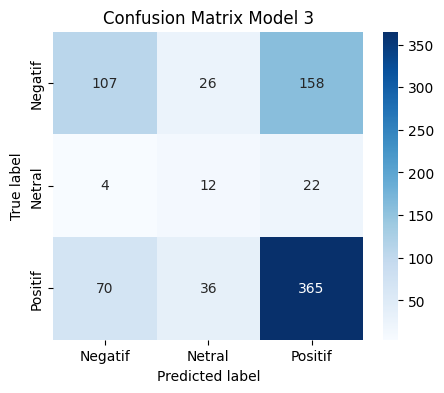


Model 4: alpha=0.5, fit_prior=False, class_prior=[0.3, 0.3, 0.4]
Accuracy: 0.6025
              precision    recall  f1-score   support

          -1       0.59      0.39      0.47       291
           0       0.15      0.32      0.21        38
           1       0.67      0.76      0.71       471

    accuracy                           0.60       800
   macro avg       0.47      0.49      0.46       800
weighted avg       0.62      0.60      0.60       800

Confusion Matrix:
[[114  27 150]
 [  4  12  22]
 [ 76  39 356]]


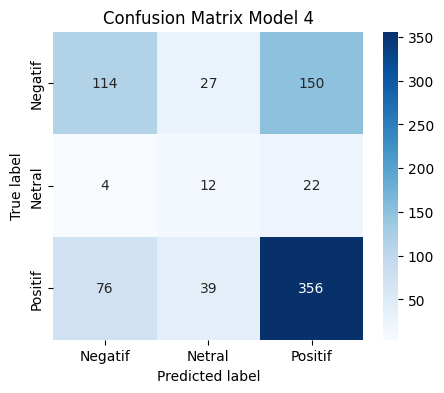

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop untuk melatih dan mengevaluasi setiap model
for i, param in enumerate(params):
    print(f"\nModel {i+1}: alpha={param['alpha']}, fit_prior={param['fit_prior']}, class_prior={param['class_prior']}")

    # Membuat model Naive Bayes dengan parameter tertentu
    nb_model = MultinomialNB(alpha=param['alpha'], fit_prior=param['fit_prior'], class_prior=param['class_prior'])

    # Melatih model
    nb_model.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = nb_model.predict(X_test)

    # Menampilkan akurasi dan laporan klasifikasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title(f'Confusion Matrix Model {i+1}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Model 1: alpha=1.0, fit_prior=True, class_prior=None
Accuracy: 0.6362
              precision    recall  f1-score   support

          -1       0.61      0.31      0.41       291
           0       0.64      0.18      0.29        38
           1       0.64      0.88      0.74       471

    accuracy                           0.64       800
   macro avg       0.63      0.46      0.48       800
weighted avg       0.63      0.64      0.60       800

Confusion Matrix:
[[ 89   1 201]
 [  2   7  29]
 [ 55   3 413]]


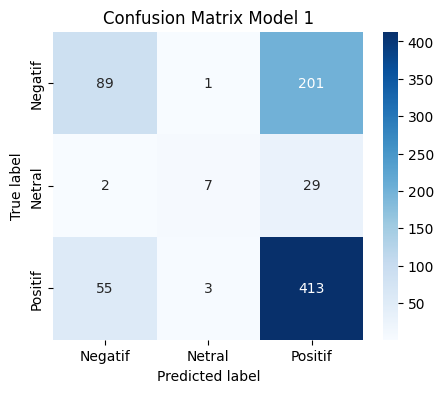


Model 2: alpha=0.5, fit_prior=True, class_prior=None
Accuracy: 0.6400
              precision    recall  f1-score   support

          -1       0.61      0.35      0.44       291
           0       0.58      0.18      0.28        38
           1       0.65      0.86      0.74       471

    accuracy                           0.64       800
   macro avg       0.61      0.46      0.49       800
weighted avg       0.63      0.64      0.61       800

Confusion Matrix:
[[101   1 189]
 [  2   7  29]
 [ 63   4 404]]


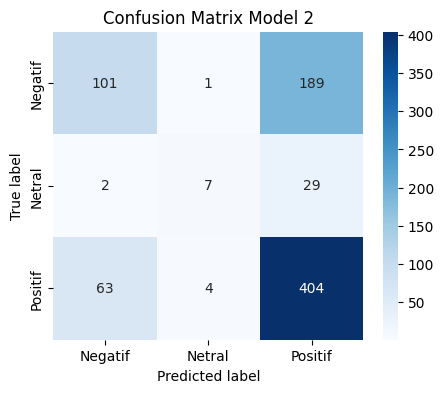


Model 3: alpha=1.0, fit_prior=False, class_prior=[0.3, 0.3, 0.4]
Accuracy: 0.6050
              precision    recall  f1-score   support

          -1       0.59      0.37      0.45       291
           0       0.16      0.32      0.21        38
           1       0.67      0.77      0.72       471

    accuracy                           0.60       800
   macro avg       0.47      0.49      0.46       800
weighted avg       0.62      0.60      0.60       800

Confusion Matrix:
[[107  26 158]
 [  4  12  22]
 [ 70  36 365]]


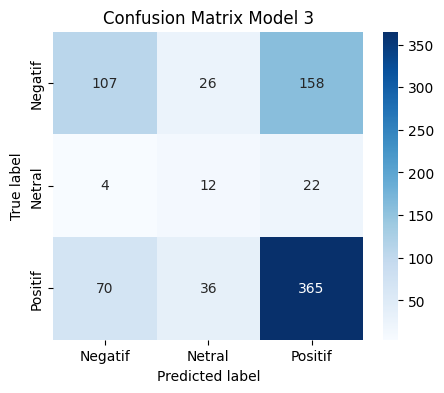


Model 4: alpha=0.5, fit_prior=False, class_prior=[0.3, 0.3, 0.4]
Accuracy: 0.6025
              precision    recall  f1-score   support

          -1       0.59      0.39      0.47       291
           0       0.15      0.32      0.21        38
           1       0.67      0.76      0.71       471

    accuracy                           0.60       800
   macro avg       0.47      0.49      0.46       800
weighted avg       0.62      0.60      0.60       800

Confusion Matrix:
[[114  27 150]
 [  4  12  22]
 [ 76  39 356]]


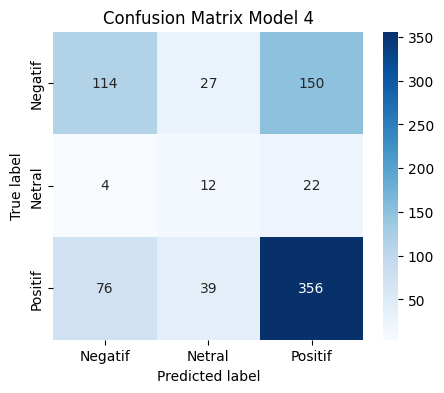

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop untuk melatih dan mengevaluasi setiap model
for i, param in enumerate(params):
    print(f"\nModel {i+1}: alpha={param['alpha']}, fit_prior={param['fit_prior']}, class_prior={param['class_prior']}")

    # Membuat model Naive Bayes dengan parameter tertentu
    nb_model = MultinomialNB(alpha=param['alpha'], fit_prior=param['fit_prior'], class_prior=param['class_prior'])

    # Melatih model
    nb_model.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = nb_model.predict(X_test)

    # Menampilkan akurasi dan laporan klasifikasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title(f'Confusion Matrix Model {i+1}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
